In [1]:
#import all the packages I need
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns
import fastcluster


In [2]:
#import the mobsuite crosstabs with all the results
mobsuite = pd. read_csv("/home/haley/Desktop/Complete_Assemblies_Plasmid/12122022_EcoliPlasmidDetection_isolates_crosstab_mobsuite_analysisfriendly_PP_clustermap.csv")

In [3]:
new =mobsuite['Isolate_Name'].str.split('-', expand=True)
mobsuite["Isolates1"]= new[2]
mobsuite["Isolates2"]=new[3]

In [4]:
cols = ['Isolates1', 'Isolates2']
mobsuite['Isolate'] = mobsuite[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [5]:
mobsuite2 = mobsuite.drop(['Isolates1', 'Isolates2'], axis = 1)

In [6]:
mobsuite3 = mobsuite2.loc[:, (mobsuite2 != 0).any(axis=0)]

In [7]:
mobsuite4 =mobsuite3.drop(["Novel_Plasmids"], axis=1)

In [8]:
mobsuite4.head()

,Isolate_Name,Source,AA162,AA175,AA176,AA178,AA179,AA281,AA313,AA315,...,AB714,AC026,AC028,AC509,AC622,AC748,AD482,AD669,AF267,Isolate
0,EC-A-0012-C5-H-CuP-CeN,Cecal,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0012-C5
1,EC-A-0205-C9-H-CuP-CeP,Cecal,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0205-C9
2,EC-A-4957-3S1-D-CuP-CeN,Diseased,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,4957-3S1
3,EC-A-4957-C3-H-CuP-CeP,Cecal,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4957-C3
4,EC-A-6245-C4-H-CuP-CeP,Cecal,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6245-C4


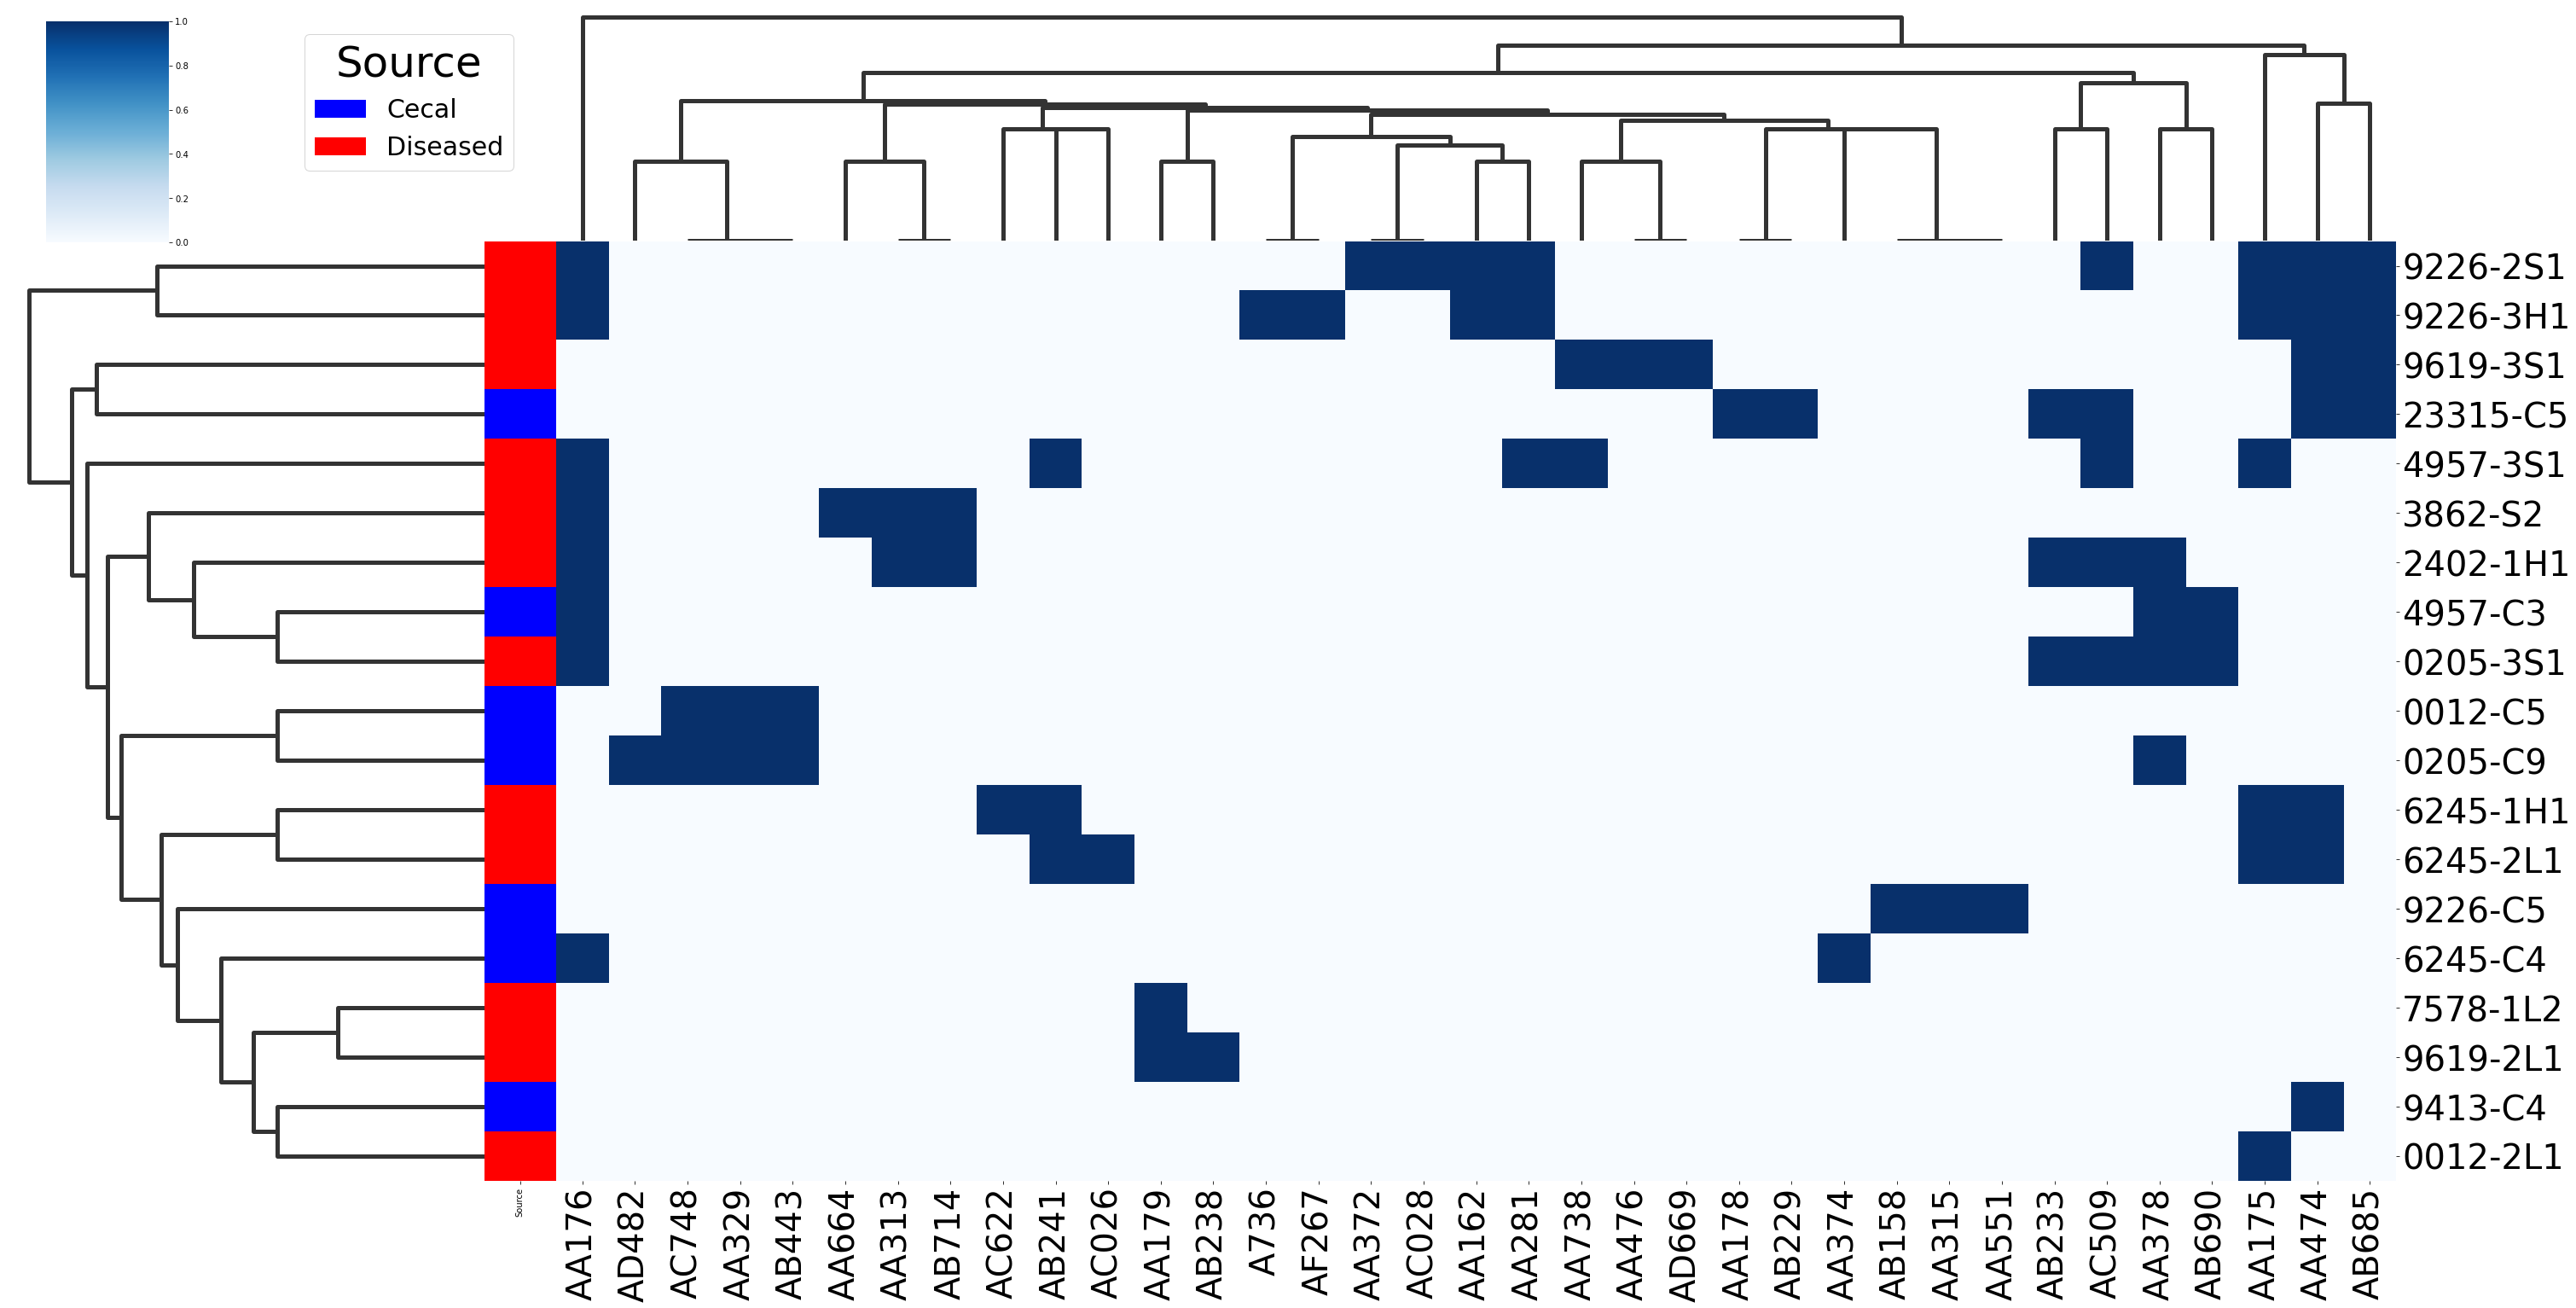

In [11]:
#make the clustermap
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


NUMERICAL_COLS = mobsuite4.columns[2:37]
Source=mobsuite4["Source"]

pal = sns.color_palette(("b", "r"), len(mobsuite4.Source.unique()))
lut = dict(zip(mobsuite4.Source.unique(), pal))
sources = mobsuite4.Source
colors = pd.Series(sources).map(lut)          

g =sb.clustermap(mobsuite4[NUMERICAL_COLS],metric="euclidean", figsize=(40,20),cmap="Blues", standard_scale=1,row_colors=colors, yticklabels= mobsuite4['Isolate'],row_cluster=True,col_cluster=True,tree_kws=dict(linewidths=5))
g.dendrogram_col.linkage 
g.dendrogram_row.linkage
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 40, rotation = 90)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 40, rotation = 360)
 


handles = [Patch(facecolor=lut[name]) for name in lut]
a = plt.legend(handles, lut, title='Source', loc="upper left", bbox_to_anchor=(2, 1), fontsize= 30)
a.get_title().set_fontsize('50')


plot.savefig("12122022_EcoliPlasmidDetection_HC_smaller_font.png", dpi =300, bbox_inches= "tight")
